In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy.io.wavfile as siowav
import IPython
from scipy.signal import find_peaks
import sounddevice as sd
import wavio as wv
from scipy import signal

In [2]:
rollno = 224
alpha = 1 + np.mod(rollno,3)

# Problem 1

Text(0.5, 1.0, 'Hanning 300 samples')

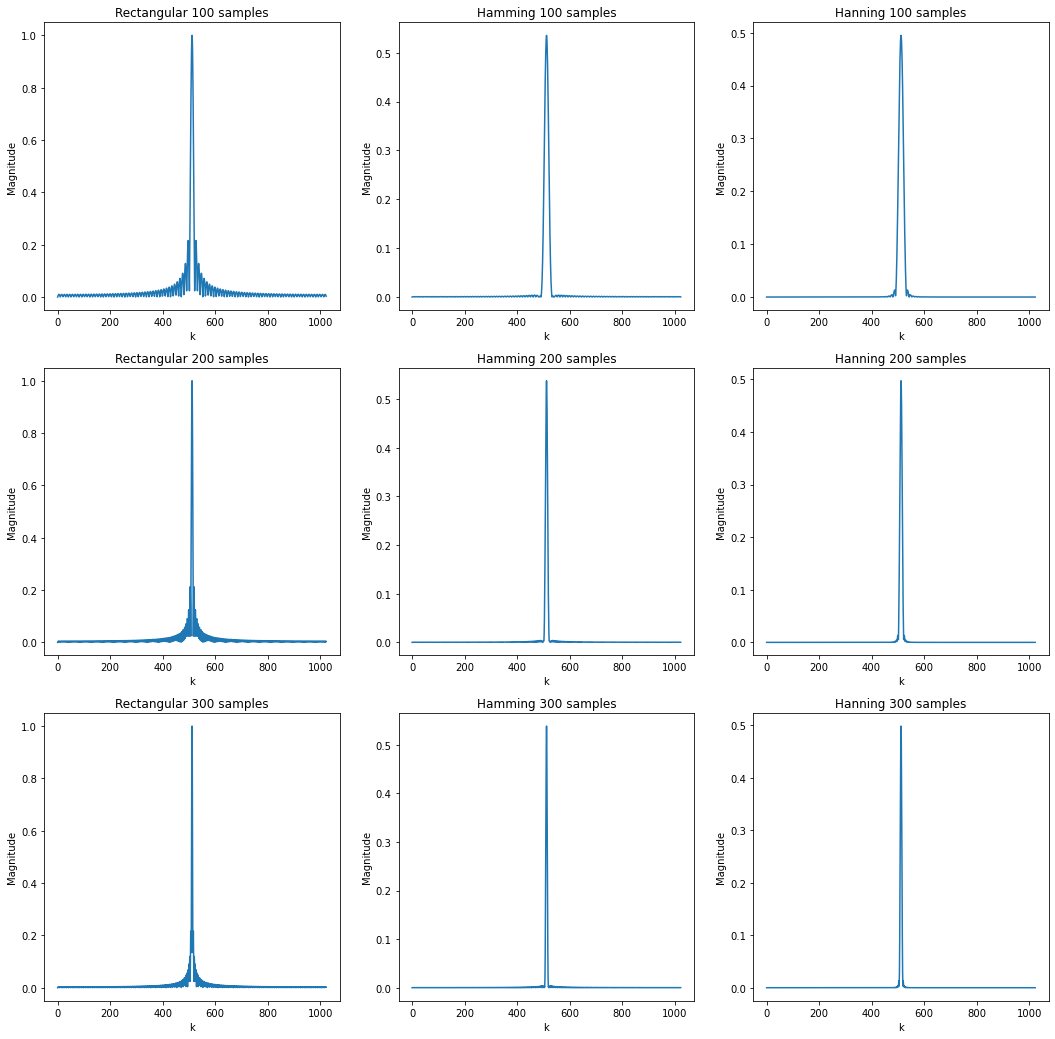

In [11]:
rect_100 = np.ones(100)
rect_200 = np.ones(200)
rect_300 = np.ones(300)

hamming_100 = np.hamming(100)
hamming_200 = np.hamming(200)
hamming_300 = np.hamming(300)

hanning_100 = np.hanning(100)
hanning_200 = np.hanning(200)
hanning_300 = np.hanning(300)


plt.figure(figsize=(18,18))

plt.subplot(331)
plt.plot(np.fft.fftshift(abs(np.fft.fft(rect_100,1024))/100))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Rectangular 100 samples')
plt.subplot(332)
plt.plot(np.fft.fftshift(abs(np.fft.fft(hamming_100,1024))/100))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Hamming 100 samples')
plt.subplot(333)
plt.plot(np.fft.fftshift(abs(np.fft.fft(hanning_100,1024))/100))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Hanning 100 samples')
plt.subplot(334)
plt.plot(np.fft.fftshift(abs(np.fft.fft(rect_200,1024))/200))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Rectangular 200 samples')
plt.subplot(335)
plt.plot(np.fft.fftshift(abs(np.fft.fft(hamming_200,1024))/200))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Hamming 200 samples')
plt.subplot(336)
plt.plot(np.fft.fftshift(abs(np.fft.fft(hanning_200,1024))/200))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Hanning 200 samples')
plt.subplot(337)
plt.plot(np.fft.fftshift(abs(np.fft.fft(rect_300,1024))/300))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Rectangular 300 samples')
plt.subplot(338)
plt.plot(np.fft.fftshift(abs(np.fft.fft(hamming_300,1024))/300))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Hamming 300 samples')
plt.subplot(339)
plt.plot(np.fft.fftshift(abs(np.fft.fft(hanning_300,1024))/300))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Hanning 300 samples')

#plt.savefig('windows.png')

# Problem 2

C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Ideal low pass filter in time domain')

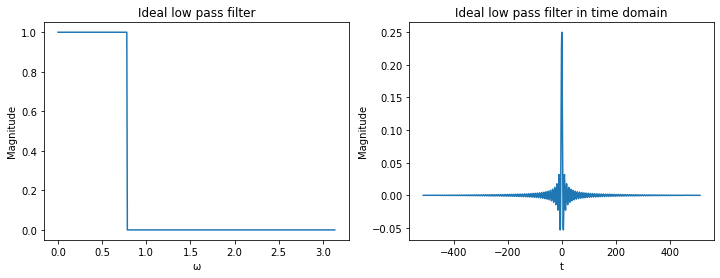

In [22]:
w = np.arange(-np.pi, np.pi, 2*np.pi/1024)
t = np.arange(-512,512)
ideal = np.zeros(1024)
ideal[:128] = 1
ideal[-128:] = 1
ideal_t = np.fft.ifft(ideal)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(w[-512:],np.fft.fftshift(ideal)[-512:])
plt.xlabel('\u03C9')
plt.ylabel('Magnitude')
plt.title('Ideal low pass filter')
plt.subplot(122)
plt.plot(t,np.fft.fftshift(ideal_t))
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.title('Ideal low pass filter in time domain')

C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Hanning windowed signal')

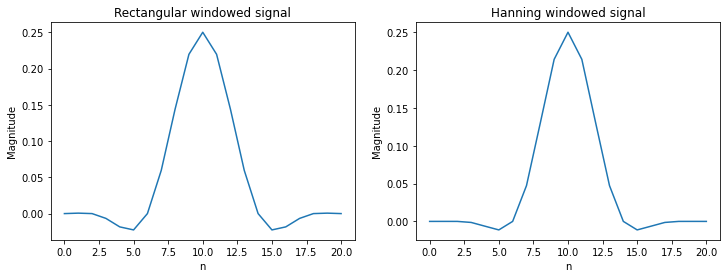

In [23]:
segmented_signal = np.roll(ideal_t, 10)[:21]*np.hanning(21)
rect_windowed = np.ones(21)*segmented_signal
hanning_windowed = np.hanning(21)*segmented_signal
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(rect_windowed)
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Rectangular windowed signal')
plt.subplot(122)
plt.plot(hanning_windowed)
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Hanning windowed signal')

C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\fft\_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\fft\_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\fft\_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\fft\_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


Text(0.5, 1.0, 'Phase after Hanning windowing')

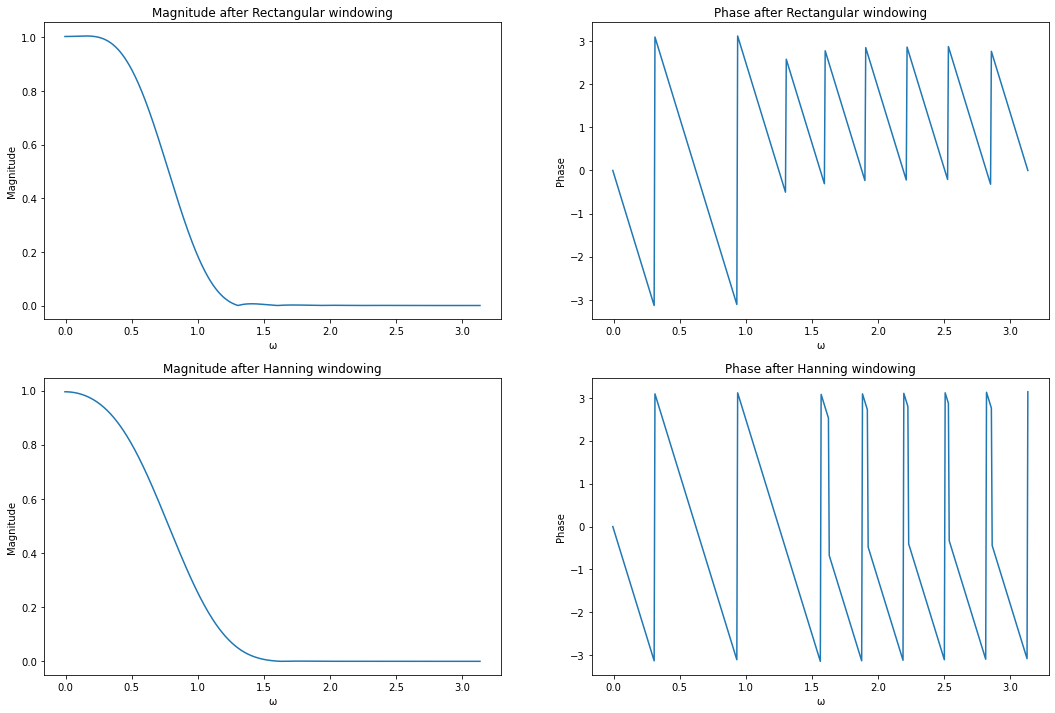

In [30]:
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.plot(w[-513:],abs(np.fft.rfft(rect_windowed,1024)))
plt.xlabel('\u03C9')
plt.ylabel('Magnitude')
plt.title('Magnitude after Rectangular windowing')
plt.subplot(222)
plt.plot(w[-513:],np.angle(np.fft.rfft(rect_windowed,1024)))
plt.xlabel('\u03C9')
plt.ylabel('Phase')
plt.title('Phase after Rectangular windowing')
plt.subplot(223)
plt.plot(w[-513:],abs(np.fft.rfft(hanning_windowed,1024)))
plt.xlabel('\u03C9')
plt.ylabel('Magnitude')
plt.title('Magnitude after Hanning windowing')
plt.subplot(224)
plt.plot(w[-513:],np.angle(np.fft.rfft(hanning_windowed,1024)))
plt.xlabel('\u03C9')
plt.ylabel('Phase')
plt.title('Phase after Hanning windowing')

C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Impulse response after Hanning windowing')

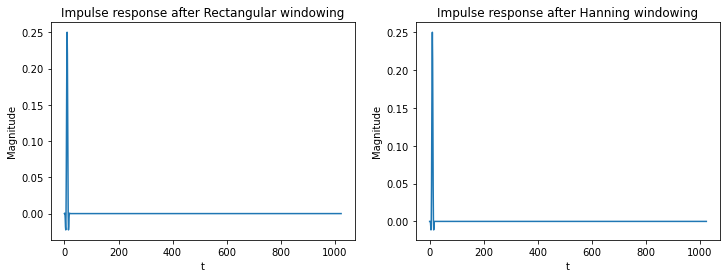

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(np.fft.ifft(np.fft.fft(rect_windowed,1024)))
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.title('Impulse response after Rectangular windowing')
plt.subplot(122)
plt.plot(np.fft.ifft(np.fft.fft(hanning_windowed,1024)))
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.title('Impulse response after Hanning windowing')

# Problem 3

Text(0.5, 1.0, 'Spectogram of instrument')

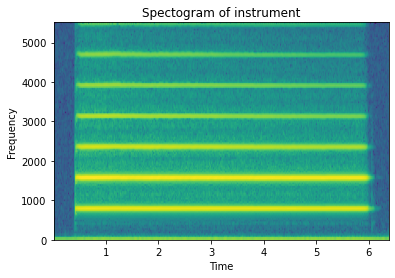

In [3]:
Fs, instrument = siowav.read('instru3.wav')
Hz = np.arange(0,Fs,Fs/len(instrument))
ideal = np.zeros(len(instrument))
ideal[4000:6000] = 1
ideal[-6000:-4000] = 1
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(instrument, Fs=Fs, sides='onesided')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram of instrument')

In [4]:
len(instrument)

70504

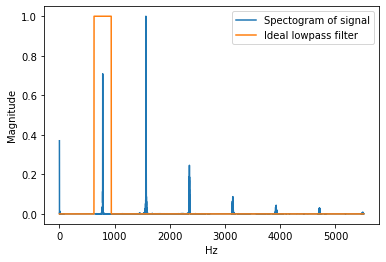

In [25]:
plt.plot(Hz[:int(1+len(instrument)/2)],abs(np.fft.rfft(instrument))/max(abs(np.fft.fft(instrument))))
plt.plot(Hz[:int(1+len(instrument)/2)],ideal[:int(1+len(instrument)/2)])
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.legend(['Spectogram of signal','Ideal lowpass filter'])

C:\Users\Shreyas\anaconda3\lib\site-packages\numpy\fft\_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


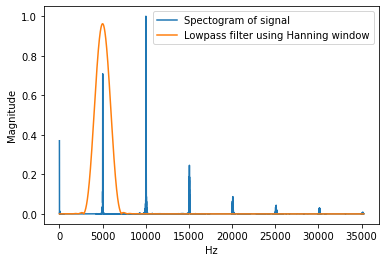

In [26]:
ideal_t = np.fft.ifft(ideal)
segmented_signal = np.roll(ideal_t, 50)[:101]*np.hanning(101)
plt.plot(abs(np.fft.rfft(instrument))/max(abs(np.fft.rfft(instrument))))
plt.plot(abs(np.fft.rfft(segmented_signal, len(instrument))))
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.legend(['Spectogram of signal','Lowpass filter using Hanning window'])

Text(0.5, 1.0, 'Spectogram of filtered signal')

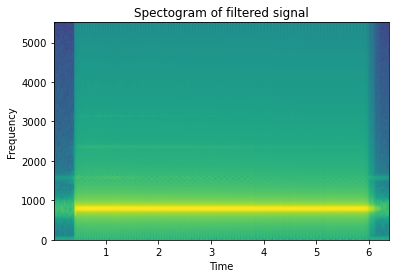

In [21]:
instru_filtered = np.fft.ifft(np.fft.fft(instrument)*abs(np.fft.fft(segmented_signal, len(instrument))))
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(instru_filtered, Fs=Fs, sides='onesided')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram of filtered signal')